# **Data Cleaning**

# We are going to give a unique code for each injury reason in the dataset.

In [2]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("player_injuries_clean_v2.csv")

In [6]:
df.head(50)

,player_id,season_name,injury_reason,from_date,end_date,days_missed,games_missed,date_of_birth,age_at_injury,had_injury_before
0,2,95/96,Ankle injury,1996-06-05,1996-07-01,27.0,1,1968-12-18,27.0,0
1,3,98/99,Shin bruise,1999-04-14,1999-05-02,19.0,3,1967-12-29,31.0,0
2,5,07/08,Broken cheekbone,2007-12-15,2008-01-05,22.0,1,1973-05-17,34.0,0
3,5,07/08,strain,2008-02-28,2008-03-03,5.0,1,1973-05-17,34.0,0
4,6,08/09,Knee problems,2008-12-05,2008-12-15,11.0,2,1973-08-06,35.0,0
5,6,09/10,Knee problems,2010-02-27,2010-03-11,13.0,4,1973-08-06,36.0,1
6,6,08/09,muscle stiffness,2008-10-26,2008-10-30,5.0,1,1973-08-06,35.0,0
7,7,04/05,Broken fibula,2004-07-01,2004-08-10,41.0,1,1978-07-08,25.0,0
8,7,02/03,Calf injury,2002-12-05,2002-12-17,13.0,2,1978-07-08,24.0,0
9,7,03/04,Outer ligament tear,2003-11-25,2004-05-31,189.0,27,1978-07-08,25.0,0


In [12]:
num_unique_injuries = df['injury_reason'].nunique()
print(f"There are {num_unique_injuries} unique injury reasons in the dataset.")

There are 337 unique injury reasons in the dataset.


# injury_code for injury_reason
We are going to assign a unique numerical code to each unique "injury_reason" in our DataFrame. we will create a new column "injury_code" for this purpose.

In [15]:
df['injury_code'] = pd.factorize(df['injury_reason'])[0]
print(df[['injury_reason', 'injury_code']].head())

      injury_reason  injury_code
0      Ankle injury            0
1       Shin bruise            1
2  Broken cheekbone            2
3            strain            3
4     Knee problems            4


# Injury Type Distribution

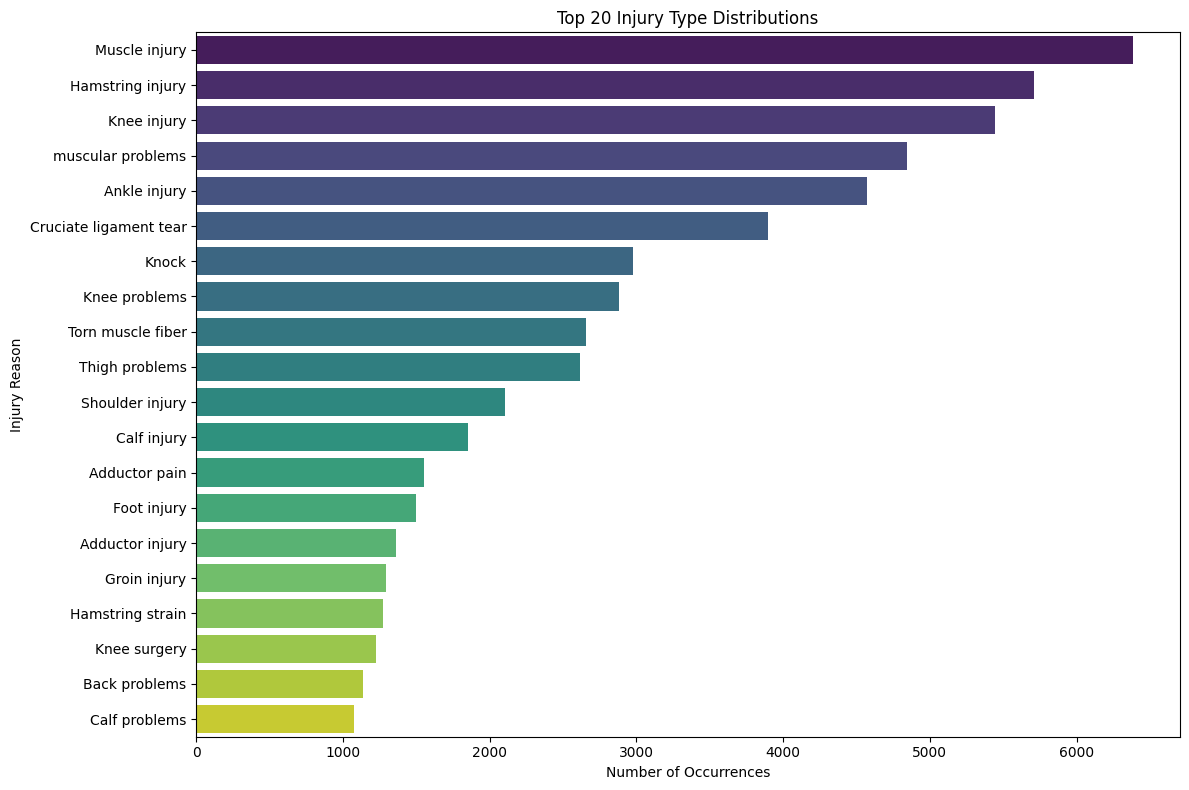

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# So at first we are going to count the occurrences of each injury reason
injury_counts = df['injury_reason'].value_counts().reset_index()
injury_counts.columns = ['injury_reason', 'count']

# Next up we will select the top N injury reasons for better visualization (if there are too many unique reasons)
# For now, let's plot all, but if it's too crowded, we might need to adjust.
top_n = 20 # we can adjust this number
if len(injury_counts) > top_n:
    injury_counts_plot = injury_counts.head(top_n)
    plot_title = f'Top {top_n} Injury Type Distributions'
else:
    injury_counts_plot = injury_counts
    plot_title = 'Injury Type Distributions'

plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='injury_reason', hue='injury_reason', data=injury_counts_plot, palette='viridis', legend=False)
plt.title(plot_title)
plt.xlabel('Number of Occurrences')
plt.ylabel('Injury Reason')
plt.tight_layout()
plt.savefig('injury_type_distribution.png')
plt.show()

In [33]:
df.head(50)

,player_id,season_name,injury_reason,from_date,end_date,days_missed,games_missed,date_of_birth,age_at_injury,had_injury_before,injury_code
0,2,95/96,Ankle injury,1996-06-05,1996-07-01,27.0,1,1968-12-18,27.0,0,0
1,3,98/99,Shin bruise,1999-04-14,1999-05-02,19.0,3,1967-12-29,31.0,0,1
2,5,07/08,Broken cheekbone,2007-12-15,2008-01-05,22.0,1,1973-05-17,34.0,0,2
3,5,07/08,strain,2008-02-28,2008-03-03,5.0,1,1973-05-17,34.0,0,3
4,6,08/09,Knee problems,2008-12-05,2008-12-15,11.0,2,1973-08-06,35.0,0,4
5,6,09/10,Knee problems,2010-02-27,2010-03-11,13.0,4,1973-08-06,36.0,1,4
6,6,08/09,muscle stiffness,2008-10-26,2008-10-30,5.0,1,1973-08-06,35.0,0,5
7,7,04/05,Broken fibula,2004-07-01,2004-08-10,41.0,1,1978-07-08,25.0,0,6
8,7,02/03,Calf injury,2002-12-05,2002-12-17,13.0,2,1978-07-08,24.0,0,7
9,7,03/04,Outer ligament tear,2003-11-25,2004-05-31,189.0,27,1978-07-08,25.0,0,8


In [34]:
df.to_csv("player_injuries_clean_v3.csv", index=False)